In [ ]:
import zipfile

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/ML Data/UTKFaceData/UTKFace.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/ML Data/UTKFaceData//tmp")
zip_ref.close()

In [ ]:
import os
folder = "/content/drive/My Drive/ML Data/UTKFaceData/tmp/UTKFace/"

filenames = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]
print(filenames)

['80_0_2_20170112220346479.jpg.chip.jpg', '80_0_2_20170112222101890.jpg.chip.jpg', '80_0_2_20170112224207667.jpg.chip.jpg', '80_0_2_20170112224311842.jpg.chip.jpg', '80_0_2_20170112224352147.jpg.chip.jpg', '80_0_2_20170112224358076.jpg.chip.jpg', '80_0_2_20170112224623307.jpg.chip.jpg', '80_0_2_20170116233216420.jpg.chip.jpg', '80_0_3_20170117174541085.jpg.chip.jpg', '80_1_0_20170109142913604.jpg.chip.jpg', '80_1_0_20170110122217473.jpg.chip.jpg', '80_1_0_20170110122234919.jpg.chip.jpg', '80_1_0_20170110122439310.jpg.chip.jpg', '80_1_0_20170110125303427.jpg.chip.jpg', '80_1_0_20170110131358567.jpg.chip.jpg', '80_1_0_20170110131552667.jpg.chip.jpg', '80_1_0_20170110131652409.jpg.chip.jpg', '80_1_0_20170110131703927.jpg.chip.jpg', '80_1_0_20170110131934630.jpg.chip.jpg', '80_1_0_20170110131953974.jpg.chip.jpg', '80_1_0_20170110140603775.jpg.chip.jpg', '80_1_0_20170110140819226.jpg.chip.jpg', '80_1_0_20170110140948978.jpg.chip.jpg', '80_1_0_20170110141320400.jpg.chip.jpg', '80_1_0_2017011

In [ ]:
print(len(filenames))

23708


In [ ]:
import numpy as np

y = np.array([[i.split('_')[0]]  for i in filenames])

print(y[1:10])

[['100']
 ['100']
 ['100']
 ['100']
 ['100']
 ['100']
 ['100']
 ['100']
 ['100']]


In [ ]:
import cv2
# img = []
grey = []
for file in filenames:
  img_temp = cv2.imread(folder+file)
  img_temp = cv2.resize(img_temp, (100,100))
  img.append(img_temp)

  grey_temp = cv2.cvtColor(img_temp, cv2.COLOR_BGR2GRAY)
  grey_temp = cv2.resize(grey_temp,(100,100))
  grey.append(grey_temp) 

In [ ]:
print(type(img),type(grey))

img = np.array(img, dtype = np.uint8)
grey = np.array(grey, dtype = np.uint8)

print(type(img),type(grey))

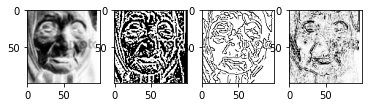

In [ ]:
import matplotlib.pyplot as plt

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(grey[10])
grey_test = cv2.equalizeHist(grey[10])

th3 = cv2.adaptiveThreshold(grey_test,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,5,2)
sobel = cv2.Canny(grey_test, 110, 200)

ddepth = cv2.CV_16S
dst1 = cv2.Laplacian(grey_test, ddepth, ksize=3)
Lap_img = cv2.convertScaleAbs(dst1)

plt.subplot(1,4,1)
plt.imshow(grey_test, cmap = 'Greys')

plt.subplot(1,4,2)
plt.imshow(th3, cmap = 'Greys')

plt.subplot(1,4,3)
plt.imshow(sobel, cmap = 'Greys')

plt.subplot(1,4,4)
plt.imshow(Lap_img, cmap = 'Greys')

Clearly guassian thresholding is better than sobel filters and laplace filters

In [ ]:
grey_final = []

for i in range(0,23708):
  greyd = grey[i]
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl1 = clahe.apply(greyd)
  grey_temp = cv2.equalizeHist(greyd)

  grey_1 = cv2.adaptiveThreshold(grey_temp,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,5,2)
  grey_1 = grey_1.ravel()

  ddepth = cv2.CV_16S
  dst1 = cv2.Laplacian(grey_temp, ddepth, ksize=3)
  grey_2 = cv2.convertScaleAbs(dst1)
  grey_2 = grey_2.ravel()

  if i == 0:
    print(grey_1.shape)
    d = input("Interupt")

  grey_3 = np.concatenate((grey_1, grey_2), axis=None)
  if i == 0 :
    print(grey_3.shape)
    fg = input("Int 2")
  grey_final.append(grey_3)

   

(10000,)
Interuptf
(20000,)
Int 2ddd


In [ ]:
grey_final = np.array(grey_final)
grey_final = grey_final.astype(np.float)
grey = np.round(grey/255, 3)
print(grey_final.shape)
print(grey_final.dtype)

(23708, 20000)
float64


In [ ]:
np.save("/content/drive/My Drive/ML Data/Grey_Image_Filtered.npy", grey_final)

###Restart run time after this

In [ ]:
print(img.shape)
print(type(img))

(23708, 100, 100, 3)
<class 'numpy.ndarray'>


In [ ]:
print(y)

[['100']
 ['100']
 ['100']
 ...
 ['9']
 ['9']
 ['9']]


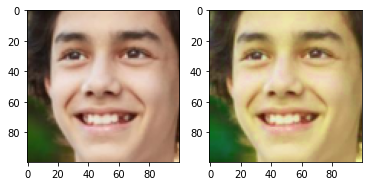

In [ ]:
import cv2
lookUpTable1 = np.empty((1,256), np.uint8)
for i in range(256):
  lookUpTable1[0,i] = np.clip(pow(i / 255.0, 1.5) * 255.0, 0, 255)

lookUpTable2 = np.empty((1,256), np.uint8)
for i in range(256):
  lookUpTable2[0,i] = np.clip(pow(i / 255.0, 1.2) * 255.0, 0, 255)

lookUpTable3 = np.empty((1,256), np.uint8)
for i in range(256):
  lookUpTable3[0,i] = np.clip(pow(i / 255.0, 0.8) * 255.0, 0, 255)

plt.subplot(1,2,1)
image_temperoray = cv2.cvtColor(img[100], cv2.COLOR_BGR2RGB)
plt.imshow(image_temperoray)

for i in range(0,23708):
  imgd = img[i,:,:,:]
  hsv = cv2.cvtColor(imgd, cv2.COLOR_BGR2HSV)
  
  vSum = sum(hsv[:,:,2].reshape(-1))/10000
  if(vSum > 50):
    imgd = cv2.LUT(hsv, lookUpTable3)
  elif (vSum > 30 ):
    imgd = cv2.LUT(hsv, lookUpTable2)
  else:
    imgd = cv2.LUT(hsv, lookUpTable1)
  
  img[i] = cv2.cvtColor(imgd, cv2.COLOR_HSV2BGR)


plt.subplot(1,2,2)
image_temperoray = cv2.cvtColor(img[100], cv2.COLOR_BGR2RGB)
plt.imshow(image_temperoray)

In [ ]:
np.save("/content/drive/My Drive/ML Data/Age.npy", y)

In [ ]:
np.save("/content/drive/My Drive/ML Data/UTKFaceData/Image_Preprocessed.npy", img)